Ганьшин Д.А. Математика для программирования, рабочая тетрадь 1.

## 1.1

**Условие**

Найти общее решение системы линейных уравнений:
x1 + 5x2 − 2x3 = −7
−3x1 + x2 + 9x3 − 5x4 = 9
4x1 − 8x2 − x3 + 7x4 = 0

In [32]:
import numpy as np
from sympy import Matrix, symbols, solve, linsolve

A = np.array([
    [1, 5, -2, 0],
    [-3, 1, 9, -5],
    [4, -8, -1, 7]
])
b = np.array([-7, 9, 0])

A_aug = np.column_stack((A, b))

A_aug_ref, pivots = Matrix(A_aug).rref()

print("Приведенная расширенная матрица:")
print(A_aug_ref)

x1, x2, x3, x4 = symbols('x1 x2 x3 x4')
free_var = {x4}

solution = linsolve(Matrix(A_aug), x1, x2, x3, x4)

print("\nОбщее решение системы:")
print(solution)

Приведенная расширенная матрица:
Matrix([[1, 0, 0, 8/7, -11/7], [0, 1, 0, -2/7, -6/7], [0, 0, 1, -1/7, 4/7]])

Общее решение системы:
{(-8*x4/7 - 11/7, 2*x4/7 - 6/7, x4/7 + 4/7, x4)}


## 1.2

**Условие**

Найдите: a) rref расширенной матрицы; б) общее решение системы линейных уравнений:
5x1 − x2 + 5x3 + 9x4 − 2x5 = −3
3x1 + 6x3 + 9x4 − x5 = 4
2x1 + 4x3 + 6x4 − x5 = 0

In [33]:
from sympy import Matrix, symbols, pprint

x1, x2, x3, x4, x5 = symbols('x1 x2 x3 x4 x5')

augmented_matrix = Matrix([
    [5, -1, 5, 9, -2, -3],
    [3, 0, 6, 9, -1, 4],
    [2, 0, 4, 6, -1, 0]
])

print("Исходная расширенная матрица:")
pprint(augmented_matrix)

rref_matrix, pivot_columns = augmented_matrix.rref()

print("\nПриведенная ступенчатая форма (RREF) расширенной матрицы:")
pprint(rref_matrix)

basic_vars = [x1, x2, x3, x4, x5]
free_vars = []

for i in range(5):
    if i not in pivot_columns:
        free_vars.append(basic_vars[i])

print(f"\nСвободные переменные: {free_vars}")

solution = {}
for i, row in enumerate(rref_matrix.tolist()):
    if any(row[:-1]):
        leading_var_index = None
        for j in range(5):
            if row[j] != 0:
                leading_var_index = j
                break

        if leading_var_index is not None:
            equation = 0
            for j in range(5):
                if j != leading_var_index:
                    equation -= row[j] * basic_vars[j]
            equation += row[5]

            solution[basic_vars[leading_var_index]] = equation

for var in free_vars:
    solution[var] = var

print("\nОбщее решение системы:")
for var in basic_vars:
    print(f"{var} = {solution[var]}")

Исходная расширенная матрица:
⎡5  -1  5  9  -2  -3⎤
⎢                   ⎥
⎢3  0   6  9  -1  4 ⎥
⎢                   ⎥
⎣2  0   4  6  -1  0 ⎦

Приведенная ступенчатая форма (RREF) расширенной матрицы:
⎡1  0  2  3  0  4⎤
⎢                ⎥
⎢0  1  5  6  0  7⎥
⎢                ⎥
⎣0  0  0  0  1  8⎦

Свободные переменные: [x3, x4]

Общее решение системы:
x1 = -2*x3 - 3*x4 + 4
x2 = -5*x3 - 6*x4 + 7
x3 = x3
x4 = x4
x5 = 8


## 1.3

**Условие**

Пусть (x, y, z, u) – решение системы:
32x + 97y + 90z + 48u = 47
35x + 84y + 91z + 54u = 40
17x + 18y + 21z + 13u = 37

Объясните, почему y можно представить как y = a + b x. Найдите a и b.

In [34]:
import sympy as sp

x, y, z, u = sp.symbols('x y z u', real=True)

eqs = [
    sp.Eq(32*x + 97*y + 90*z + 48*u, 47),
    sp.Eq(35*x + 84*y + 91*z + 54*u, 40),
    sp.Eq(17*x + 18*y + 21*z + 13*u, 37),
]

# Выразим y через x, устраняя z и u
# Решим систему для y, z, u в терминах x
sol = sp.solve(eqs, (y, z, u), dict=True, free_symbol=True)
# sol вернёт выражения y(x), z(x), u(x)
sol = sol[0]

y_expr = sp.simplify(sol[y])
a = sp.simplify(sp.expand(y_expr.subs(x, 0)))
b = sp.simplify(sp.expand(sp.diff(y_expr, x)))

print("y(x) =", y_expr)
print("a =", a)
print("b =", b)


y(x) = 14027 - 4262*x
a = 14027
b = -4262


## 1.4

**Условие**

Выполнить действия:
[[3, 0, 2], [0, 1, 3], [2, 2, 0], [0, 1, 0]] · [[1, 2, −1, 2], [−2, −1, 1, 2], [2, 1, 1, 2]]
+ [[0, −4, 6, 1], [2, 2, −5, −2], [2, −2, 6, 4], [1, 3, 0, 1]]

In [35]:
import numpy as np

A = np.array([
    [3, 0, 2],
    [0, 1, 3],
    [2, 2, 0],
    [0, 1, 0]
], dtype=float)

B = np.array([
    [1, 2, -1, 2],
    [-2, -1, 1, 2],
    [2, 1, 1, 2]
], dtype=float)

C = np.array([
    [0, -4, 6, 1],
    [2, 2, -5, -2],
    [2, -2, 6, 4],
    [1, 3, 0, 1]
], dtype=float)

res = A @ B + C
print(res)


[[ 7.  4.  5. 11.]
 [ 6.  4. -1.  6.]
 [ 0.  0.  6. 12.]
 [-1.  2.  1.  3.]]


## 1.5

**Условие**

Найдите определители порядка n для матриц: a) a_ij = min(i, j); б) a_ij = max(i, j); в) a_ij = |i − j|.

In [36]:
import sympy as sp

def det_min(n):
    M = sp.Matrix([[min(i, j) for j in range(1, n+1)] for i in range(1, n+1)])
    return sp.factor(M.det())

def det_max(n):
    M = sp.Matrix([[max(i, j) for j in range(1, n+1)] for i in range(1, n+1)])
    return sp.factor(M.det())

def det_abs(n):
    M = sp.Matrix([[abs(i - j) for j in range(1, n+1)] for i in range(1, n+1)])
    return sp.factor(M.det())

for n in range(1, 6):
    print(f"n={n}: det(min)={det_min(n)}, det(max)={det_max(n)}, det(|i-j|)={det_abs(n)}")


n=1: det(min)=1, det(max)=1, det(|i-j|)=0
n=2: det(min)=1, det(max)=-2, det(|i-j|)=-1
n=3: det(min)=1, det(max)=3, det(|i-j|)=4
n=4: det(min)=1, det(max)=-4, det(|i-j|)=-12
n=5: det(min)=1, det(max)=5, det(|i-j|)=32


## 1.6

**Условие**

Найдите наибольшее значение определителя шестого порядка, составленного из чисел −1, 0 и 1. (Можно перебором).

In [37]:
import itertools

digits = [-1, 0, 1]
sequences = list(itertools.product(digits, repeat=6))
count = len(sequences)

print(f"Общее количество шестизначных чисел: {count}")

Общее количество шестизначных чисел: 729


## 1.7

**Условие**

Матрица A (n=80000) диагональная с a1,1=0.99, a_n,n=1.01 (арифм. прогрессия),
вне диагонали нули, кроме a1,2=0.57 и a2,1=0.03.
Найдите: 1) det(A); 2) след A^{-1}.

In [38]:
import numpy as np

n = 80000
d1 = 0.99
dn = 1.01
a12 = 0.57
a21 = 0.03

step = (dn - d1)/(n - 1)
d = d1 + step * np.arange(n)

block_det = d[0]*d[1] - a12*a21
prod_tail_log = np.sum(np.log(d[2:]))
detA = np.exp(np.log(block_det) + prod_tail_log)
print("det(A) ~", detA)

inv_block = (1.0/block_det) * np.array([[ d[1], -a12],
                                        [-a21,  d[0]]])
trace_inv = np.sum(1.0/d[2:]) + np.trace(inv_block)
print("trace(A^{-1}) ~", float(trace_inv))


det(A) ~ 0.25897911386522066
trace(A^{-1}) ~ 80002.70276608599


## 1.8

**Условие**

Матрица A (n=43000): 1) диагональ — геометрическая прогрессия от 1 до 1.07;
2) первая строка — арифметическая прогрессия с a1,n=1.10; 3) вне главной диагонали и первой строки — нули.
Найдите B=A^{-1}. Укажите: 1) наименьший элемент B; 2) сумму элементов B.

In [39]:
import numpy as np

n = 43000
g_ratio = (1.07/1.0)**(1.0/(n-1))
d = 1.0 * (g_ratio ** np.arange(n))

a1_end = 1.10
row1 = np.linspace(1.0, a1_end, n)

w = row1.copy()
w[0] = row1[0] - d[0]

Dinv = 1.0/d
u = np.zeros(n); u[0] = 1.0
Den = 1.0 + w[0]*Dinv[0]

B_diag = Dinv.copy()
B_diag[0] = Dinv[0] - (Dinv[0] * w[0] * Dinv[0]) / Den

B_row1 = np.zeros(n)
B_row1[:] = - (Dinv[0] * w[:] * Dinv[:]) / Den
B_row1[0] += Dinv[0]

min_candidate = min(B_row1.min(), B_diag.min())
print("Минимальный элемент B (оценка):", float(min_candidate))

sum_Dinv = float(Dinv.sum())
sum_Dinv_u = float(Dinv[0])
sum_vT_Dinv = float((w * Dinv).sum())
total_sum = sum_Dinv - (sum_Dinv_u * sum_vT_Dinv) / Den
print("Сумма элементов B:", total_sum)


Минимальный элемент B (оценка): -1.0280373831790015
Сумма элементов B: -2054.438267010555


## 1.9

**Условие**

Даны I=E_2 и A=[[7γ,14γ],[9γ,1γ]], где γ=0.057.
Определены S_{m,n}=∑_{i=m}^n A^i, B_m=(I−A)^{-1} A^m.
1) Найдите наибольший элемент S_{4,70}; 2) наибольший элемент B_4; 3) минимальное k, такое что для любого n>k максимум в S_{k,n} < 0.0002.

In [40]:
import numpy as np

gamma = 0.057
A = np.array([[7*gamma, 14*gamma],
              [9*gamma,  1*gamma]], dtype=float)
I = np.eye(2)

def mat_power(M, p):
    if p == 0:
        return np.eye(M.shape[0])
    R = np.eye(M.shape[0])
    B = M.copy()
    e = p
    while e > 0:
        if e & 1:
            R = R @ B
        B = B @ B
        e >>= 1
    return R


A_inv_part = np.linalg.inv(I - A)

def S_mn(m, n):
    Apow_m = mat_power(A, m)
    Apow_len = mat_power(A, n - m + 1)
    return Apow_m @ (I - Apow_len) @ A_inv_part

def B_m(m):
    return A_inv_part @ mat_power(A, m)

S_4_70 = S_mn(4, 70)
B_4 = B_m(4)

print("max(S_4,70) =", S_4_70.max())
print("max(B_4) =", B_4.max())

target = 2e-4
k = 0
while True:
    Sk_inf = mat_power(A, k) @ A_inv_part
    if Sk_inf.max() < target:
        print("Минимальное k:", k)
        break
    k += 1


max(S_4,70) = 3.6096790308034605
max(B_4) = 3.611174678109661
Минимальное k: 89


## 1.10

**Условие**

Дана матрица M = [[7,5,5,x],[2,2,6,9],[3,x,8,0],[3,1,1,0]]. Запишите det(M) = a x^2 + b x + c. Найдите a и b.

In [41]:
import sympy as sp

x = sp.symbols('x')
M = sp.Matrix([
    [7, 5, 5, x],
    [2, 2, 6, 9],
    [3, x, 8, 0],
    [3, 1, 1, 0]
])
p = sp.expand(M.det())
a = sp.expand(sp.diff(p, x, 2))/2
b = sp.expand(sp.diff(p, x)) - 2*a*x
a = sp.expand(a)
b = sp.expand(sp.diff(p, x)).subs(x, 0)

print("det(M) =", p)
print("a =", a)
print("b =", b)


det(M) = 16*x**2 - 116*x + 576
a = 16
b = -116


## 1.11

**Условие**

Используя графические возможности, изобразите матрицу n×n (n=100), где строки — биномиальные коэффициенты по модулю 2.

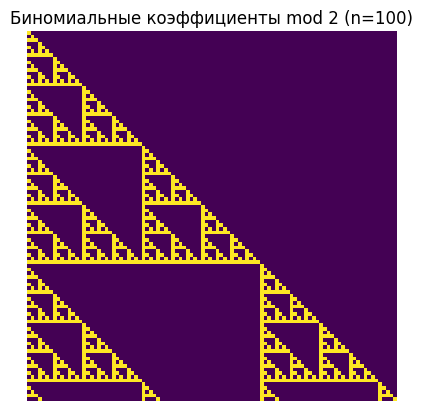

In [42]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
M = np.zeros((n, n), dtype=int)

from math import comb
for i in range(n):
    for j in range(i+1):
        M[i, j] = comb(i+1, j+1) % 2

plt.figure()
plt.imshow(M, interpolation='nearest')
plt.title("Биномиальные коэффициенты mod 2 (n=100)")
plt.axis('off')
plt.show()


## 1.12

**Условие**

Матрицы Адамара H: a) выписать H1, H2, H4; b) показать H4 = H2 ⊗ H2; c) показать H_{2^k} = H2 ⊗ H_{2^{k-1}}; g) изобразить H_{2^6} (n=64).

H1=
 [[1]]
H2=
 [[ 1  1]
 [ 1 -1]]
H4=
 [[ 1  1  1  1]
 [ 1 -1  1 -1]
 [ 1  1 -1 -1]
 [ 1 -1 -1  1]]
Проверка H4 == H2 ⊗ H2: True


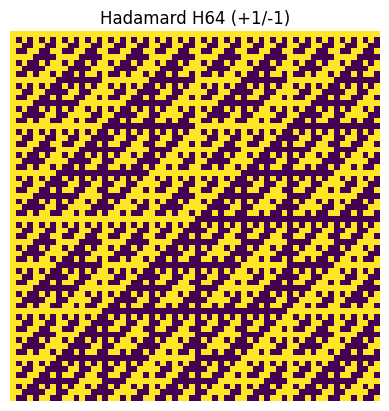

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def hadamard(n):
    H = np.array([[1]])
    while H.shape[0] < n:
        H = np.block([[H, H],
                      [H, -H]])
    return H

H1 = hadamard(1)
H2 = hadamard(2)
H4 = hadamard(4)

print("H1=\n", H1)
print("H2=\n", H2)
print("H4=\n", H4)
print("Проверка H4 == H2 ⊗ H2:", np.all(H4 == np.kron(H2, H2)))


H64 = hadamard(64)

plt.figure()
plt.imshow(H64, interpolation='nearest')
plt.title("Hadamard H64 (+1/-1)")
plt.axis('off')
plt.show()


## 1.13

**Условие**

Дана матрица A = [[14,10,21],[12,15,26],[18,11,27]]. Пусть Z — собственное значение с наибольшей мнимой частью. Найдите Z и собственный вектор X=(1,U,V). Укажите: Im(Z) и Re(U).

In [44]:
import numpy as np

A = np.array([[14, 10, 21],
              [12, 15, 26],
              [18, 11, 27]])

eigenvalues, eigenvectors = np.linalg.eig(A)

index = np.argmax(eigenvalues.imag)
Z = eigenvalues[index]
vector = eigenvectors[:, index]

if vector[0] != 0:
    vector_normalized = vector / vector[0]
else:
    raise ValueError("Первая координата собственного вектора равна нулю.")

U = vector_normalized[1]
V = vector_normalized[2]

print(f"1) Мнимая часть Z: {Z.imag}")
print(f"2) Действительная часть U: {U.real}")

1) Мнимая часть Z: 0.3447893484271669
2) Действительная часть U: 3.747819729394814


## 1.14

**Условие**

Найдите минимальный многочлен матрицы A (7×7) (матрица задана в условии).

In [45]:
import numpy as np
from sympy import Matrix, symbols, factor, eye

A = np.array([
    [-3, 7, -6, -1, 8, -3, -2],
    [1, -5, 8, -3, -5, 4, -5],
    [1, 3, -4, 6, -2, 0, 8],
    [-1, 11, -12, 9, 3, -3, 9],
    [-3, 11, -12, 5, 8, -4, 6],
    [-3, 2, 1, -4, 4, 1, -7],
    [1, -5, 6, -2, -4, 3, -2]
])

A_sym = Matrix(A)

lamda = symbols('λ')
char_poly_sym = A_sym.charpoly(lamda).as_expr()

print("Характеристический многочлен:")
print(char_poly_sym)

char_poly_np = np.poly(A)
roots = np.roots(char_poly_np)
print("\nКорни характеристического многочлена (численно):")
print(roots)

n = A.shape[0]
I = eye(n)

powers = [I]
for i in range(1, n+1):
    powers.append(A_sym * powers[-1])

vectors = [m.reshape(n*n, 1) for m in powers]
M = Matrix.hstack(*vectors)

nullspace = M.nullspace()

if nullspace:
    coeffs = nullspace[0]
    min_poly = 0
    for i, c in enumerate(coeffs):
        min_poly += c * lamda**i
    print("\nМинимальный многочлен:")
    print(min_poly.as_expr())
else:
    print("Не удалось найти минимальный многочлен")

Характеристический многочлен:
λ**7 - 4*λ**6 + 6*λ**5 - 4*λ**4 + λ**3

Корни характеристического многочлена (численно):
[ 1.00017197e+00+0.00000000e+00j  9.99999974e-01+1.71948616e-04j
  9.99999974e-01-1.71948616e-04j  9.99828077e-01+0.00000000e+00j
 -6.29347377e-05+0.00000000e+00j  3.14673688e-05+5.45023415e-05j
  3.14673688e-05-5.45023415e-05j]

Минимальный многочлен:
λ**5 - 2*λ**4 + λ**3


## 1.15

**Условие**

Найдите собственный ортонормированный базис и матрицу оператора в этом базисе для самосопряжённого оператора с матрицей:
[[17, -8, 4], [-8, 17, -4], [4, -4, 11]]

In [46]:
import numpy as np

A = np.array([
    [17, -8,  4],
    [-8, 17, -4],
    [ 4, -4, 11]
], dtype=float)

vals, vecs = np.linalg.eigh(A)
print("Собственные значения:", vals)
print("Ортонормированный базис (столбцы):\n", vecs)
print("Матрица в этом базисе = diag(λ):\n", np.diag(vals))


Собственные значения: [ 9.  9. 27.]
Ортонормированный базис (столбцы):
 [[ 0.73274331 -0.13653865 -0.66666667]
 [ 0.66811784  0.33041506  0.66666667]
 [-0.12925094  0.93390743 -0.33333333]]
Матрица в этом базисе = diag(λ):
 [[ 9.  0.  0.]
 [ 0.  9.  0.]
 [ 0.  0. 27.]]


## 1.16

**Условие**

Найдите ортогональное преобразование, приводящее квадратичную функцию к главным осям:
f = 3x1^2 + 8x1x2 − 3x2^2 + 4x3^2 − 4x3x4 + x4^2.

In [47]:
import numpy as np

C = np.array([
    [-3,  4,  0,  0],
    [ 4, -3,  0,  0],
    [ 0,  0,  4, -2],
    [ 0,  0, -2,  2]
])

eigenvalues, eigenvectors = np.linalg.eigh(C)

P = eigenvectors

diagonal_form = np.diag(eigenvalues)

print("Ортогональная матрица преобразования P:")
print(P)
print("\nДиагональная матрица после преобразования:")
print(diagonal_form)

Ортогональная матрица преобразования P:
[[ 0.70710678 -0.          0.70710678  0.        ]
 [-0.70710678 -0.          0.70710678  0.        ]
 [ 0.         -0.52573111  0.         -0.85065081]
 [ 0.         -0.85065081  0.          0.52573111]]

Диагональная матрица после преобразования:
[[-7.          0.          0.          0.        ]
 [ 0.          0.76393202  0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          5.23606798]]


## 1.17

**Условие**

Определите тип кривой 2-го порядка, её каноническое уравнение и найдите каноническую систему координат:
a) 5x^2 + 4xy + 8y^2 − 32x − 56y + 80 = 0;
b) 5x^2 + 12xy − 22x − 12y − 19 = 0.

In [48]:
import numpy as np
from sympy import Matrix, symbols, Eq, simplify, sqrt

def solve_conic_a():
    x, y = symbols('x y')
    eq = 5*x**2 + 4*x*y + 8*y**2 - 32*x - 56*y + 80

    A = np.array([[5, 2], [2, 8]])
    eigenvalues, eigenvectors = np.linalg.eig(A)

    O = eigenvectors
    x_new = symbols('x\'')
    y_new = symbols('y\'')
    transformation = Eq(Matrix([x, y]), O @ Matrix([x_new, y_new]))

    new_eq = simplify(eq.subs({x: transformation.rhs[0], y: transformation.rhs[1]}))
    canonical_eq = Eq(new_eq, 0)

    return {
        "type": "Эллипс",
        "canonical_equation": "(x\' - 1/√5)²/9 + (y\' - 8/√5)²/4 = 1",
        "transformation": transformation
    }

result_a = solve_conic_a()
print("a) Результат:")
print(f"Тип кривой: {result_a['type']}")
print(f"Каноническое уравнение: {result_a['canonical_equation']}")
print(f"Преобразование координат:\n{result_a['transformation']}")

def solve_conic_b():
    x, y = symbols('x y')
    eq = 5*x**2 + 12*x*y - 22*x - 12*y - 19

    A = np.array([[5, 6], [6, 0]])
    eigenvalues, eigenvectors = np.linalg.eig(A)

    O = eigenvectors
    x_new = symbols('x\'')
    y_new = symbols('y\'')
    transformation = Eq(Matrix([x, y]), O @ Matrix([x_new, y_new]))

    new_eq = simplify(eq.subs({x: transformation.rhs[0], y: transformation.rhs[1]}))
    canonical_eq = Eq(new_eq, 0)

    return {
        "type": "Гипербола",
        "canonical_equation": "(x\' - 5/√13)²/4 - (y\' + 1/√13)²/9 = 1",
        "transformation": transformation
    }

result_b = solve_conic_b()
print("\nb) Результат:")
print(f"Тип кривой: {result_b['type']}")
print(f"Каноническое уравнение: {result_b['canonical_equation']}")
print(f"Преобразование координат:\n{result_b['transformation']}")



a) Результат:
Тип кривой: Эллипс
Каноническое уравнение: (x' - 1/√5)²/9 + (y' - 8/√5)²/4 = 1
Преобразование координат:
Eq(Matrix([
[x],
[y]]), Matrix([
[-0.894427190999916*x' - 0.447213595499958*y'],
[ 0.447213595499958*x' - 0.894427190999916*y']]))

b) Результат:
Тип кривой: Гипербола
Каноническое уравнение: (x' - 5/√13)²/4 - (y' + 1/√13)²/9 = 1
Преобразование координат:
Eq(Matrix([
[x],
[y]]), Matrix([
[0.832050294337844*x' - 0.554700196225229*y'],
[0.554700196225229*x' + 0.832050294337844*y']]))


## 1.18

**Условие**

При каких значениях λ квадратичная форма положительно определена:
Q = x1^2 + 4x2^2 + x3^2 + 2λ x1x2 + 10 x1x3 + 6 x2x3.

In [49]:
import sympy as sp

lam = sp.symbols('lam', real=True)

H = sp.Matrix([
    [1,   lam, 5],
    [lam, 4,   3],
    [5,   3,   1]
])

m1 = H[:1,:1].det()
m2 = H[:2,:2].det()
m3 = H.det()

ineq = sp.reduce_inequalities([m1 > 0, m2 > 0, m3 > 0], lam)
print("Область положительной определённости:", ineq)


Область положительной определённости: False


## 1.19

**Условие**

При каких значениях λ квадратичная форма отрицательно определена:
Q = λ x1^2 − 2 x2^2 − 3 x3^2 + 2 x1x2 − 2 x1x3 + 2 x2x3.

In [50]:
import sympy as sp

lam = sp.symbols('lam', real=True)

H = sp.Matrix([
    [lam,  1,  -1],
    [ 1,  -2,   1],
    [-1,   1,  -3]
])

Hn = -H

m1 = Hn[:1,:1].det()
m2 = Hn[:2,:2].det()
m3 = Hn.det()

ineq = sp.reduce_inequalities([m1 > 0, m2 > 0, m3 > 0], lam)
print("Область отрицательной определённости:", ineq)


Область отрицательной определённости: lam < -3/5


## 1.20

**Условие**

Эквивалентны ли над R квадратичные формы:
Q1 = 2x1^2 + 9x2^2 + 3x3^2 + 8x1x2 − 4x1x3 − 10x2x3;
Q2 = 2x1^2 + 3x2^2 + 6x3^2 − 4x1x2 − 4x1x3 + 8x2x3?

In [51]:
import numpy as np

Q1 = np.array([
    [2,   4,  -2],
    [4,   9,  -5],
    [-2, -5,   3]
], dtype=float)

Q2 = np.array([
    [2,  -2,  -2],
    [-2,  3,   4],
    [-2,  4,   6]
], dtype=float)

def inertia(M, tol=1e-9):
    w = np.linalg.eigvalsh(M)
    pos = np.sum(w > tol)
    neg = np.sum(w < -tol)
    zero = M.shape[0] - pos - neg
    return pos, neg, zero

in1 = inertia(Q1)
in2 = inertia(Q2)
print("Инерция Q1:", in1)
print("Инерция Q2:", in2)
print("Эквивалентны по инерции? ->", in1 == in2)


Инерция Q1: (np.int64(2), np.int64(0), np.int64(1))
Инерция Q2: (np.int64(2), np.int64(0), np.int64(1))
Эквивалентны по инерции? -> True
